# **Space X  Falcon 9 First Stage Landing Prediction**
## Machine Learning Prediction


## Libraries and Auxiliary Functions


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax);
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

## Load the dataframe


In [3]:
data = pd.read_csv("d2.csv")
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [4]:
X = pd.read_csv('d3.csv')
X.head(100)

,Orbit,LaunchSite,LandingPad,Serial
0,0,1,0,1
1,0,1,0,0
2,0,1,0,0
3,0,0,0,0
4,0,1,0,0
...,...,...,...,...
85,0,0,0,0
86,0,0,0,0
87,0,0,0,0
88,0,1,0,0


In [5]:
y = data['Class'].to_numpy() 

In [6]:
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

### Spliting the data into training and test data

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [8]:
Y_test.shape

(18,)

### Creating a logistic regression object using then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [9]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']} # l1 lasso l2 ridge
lr=LogisticRegression()
gscv = GridSearchCV(lr,parameters,scoring='accuracy',cv=10)
logreg_cv = gscv.fit(X_train,Y_train)

In [10]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.6678571428571429


In [11]:
print('Accuracy=  ',logreg_cv.score(X_test,Y_test))

Accuracy=   0.6666666666666666


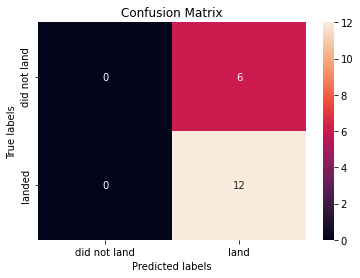

In [12]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [13]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()
gscv = GridSearchCV(svm,parameters,scoring='accuracy',cv=10)
svm_cv = gscv.fit(X_train,Y_train)

In [14]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}
accuracy : 0.6678571428571429


In [15]:
print("accuracy: ",svm_cv.score(X_test,Y_test))

accuracy:  0.6666666666666666


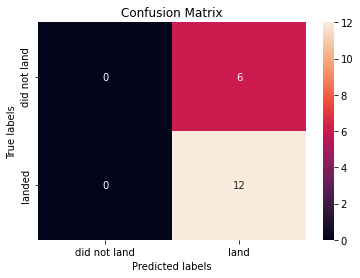

In [16]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [17]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [18]:
gscv = GridSearchCV(tree,parameters,scoring='accuracy',cv=10)
tree_cv = gscv.fit(X_train,Y_train)

In [19]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 0.6678571428571429


Calculating the accuracy of tree_cv on the test data using the method <code>score</code>:


In [20]:
print("accuracy: ",tree_cv.score(X_test,Y_test))

accuracy:  0.6666666666666666


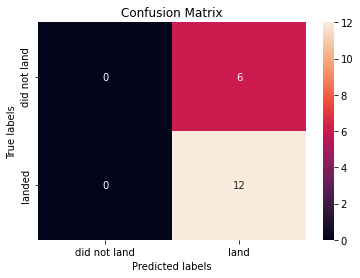

In [21]:
yhat = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [22]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [23]:
gscv = GridSearchCV(KNN,parameters,scoring='accuracy',cv=10)
knn_cv = gscv.fit(X_train,Y_train)

In [24]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'brute', 'n_neighbors': 9, 'p': 1}
accuracy : 0.6535714285714287


In [25]:
print("accuracy: ",knn_cv.score(X_test,Y_test))

accuracy:  0.6666666666666666


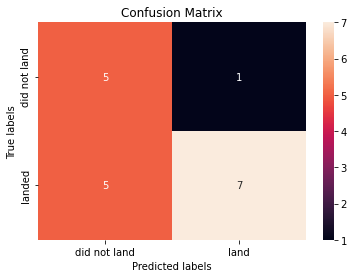

In [26]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

### Finding the best algorithm

In [27]:
algorithms = {'KNN':knn_cv.best_score_,'Tree':tree_cv.best_score_,'LogisticRegression':logreg_cv.best_score_}
bestalgorithm = max(algorithms, key=algorithms.get)
print('Best Algorithm is',bestalgorithm,'with a score of',algorithms[bestalgorithm])
if bestalgorithm == 'Tree':
    print('Best Params is :',tree_cv.best_params_)
if bestalgorithm == 'KNN':
    print('Best Params is :',knn_cv.best_params_)
if bestalgorithm == 'LogisticRegression':
    print('Best Params is :',logreg_cv.best_params_)

Best Algorithm is Tree with a score of 0.6678571428571429
Best Params is : {'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
